<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
%matplotlib inline

GPU acceleration not available, sorry
No module named 'pycuda'


In [23]:
metalmodel = ppy.metalmodels.FixedWidthNormMDF(0.2)  # fixed width MDF
dustmodel = ppy.dustmodels.FixedWidthLogNormDust(0.1)  # fixed width lognorm
agemodel = ppy.sfhmodels.NonParam()  # NonParam SFH
distancemodel = ppy.distancemodels.VariableDistance()
model_mock = ppy.galaxy.CustomGalaxy(metalmodel, dustmodel, agemodel,
                                     distancemodel)

gal_params = [-0.3]  # mean of MDF
gal_params += [-0.7]  # mean of dust distribution
gal_params += list(ppy.sfhmodels.TauModel([3.2, 8.0]).as_default().logSFH[:4])
gal_params += list(ppy.sfhmodels.TauModel([3.0, 2.0]).as_default().logSFH[4:])
gal_params += [29.4]
model_mock.set_params(np.array(gal_params))

In [24]:
np.log10(model_mock.Npix)

3.203573983037692

In [25]:
model_tau = ppy.galaxy.CustomGalaxy(ppy.metalmodels.FixedWidthNormMDF(0.2), ppy.dustmodels.FixedWidthLogNormDust(0.1), 
                                   ppy.sfhmodels.TauModel(), ppy.distancemodels.VariableDistance())
model_tau.set_params(np.array([-0.3, -0.7, 3.2, 8.0, 29.4]))

In [26]:
res = {}
res_np = {}
for i in range(1,7):
    res[i] = ppy.plotting.ResultsPlotter('results/mock_job_{:d}_tau.csv'.format(i), true_model=model_tau,
                                        run_name='Mock Job {:d}'.format(i))
    try:
        res_np[i] = ppy.plotting.ResultsPlotter('results/mock_job_{:d}_nonparam.csv'.format(i), true_model=model_mock,
                                                run_name='Mock Job {:d}'.format(i))

    except:
        pass

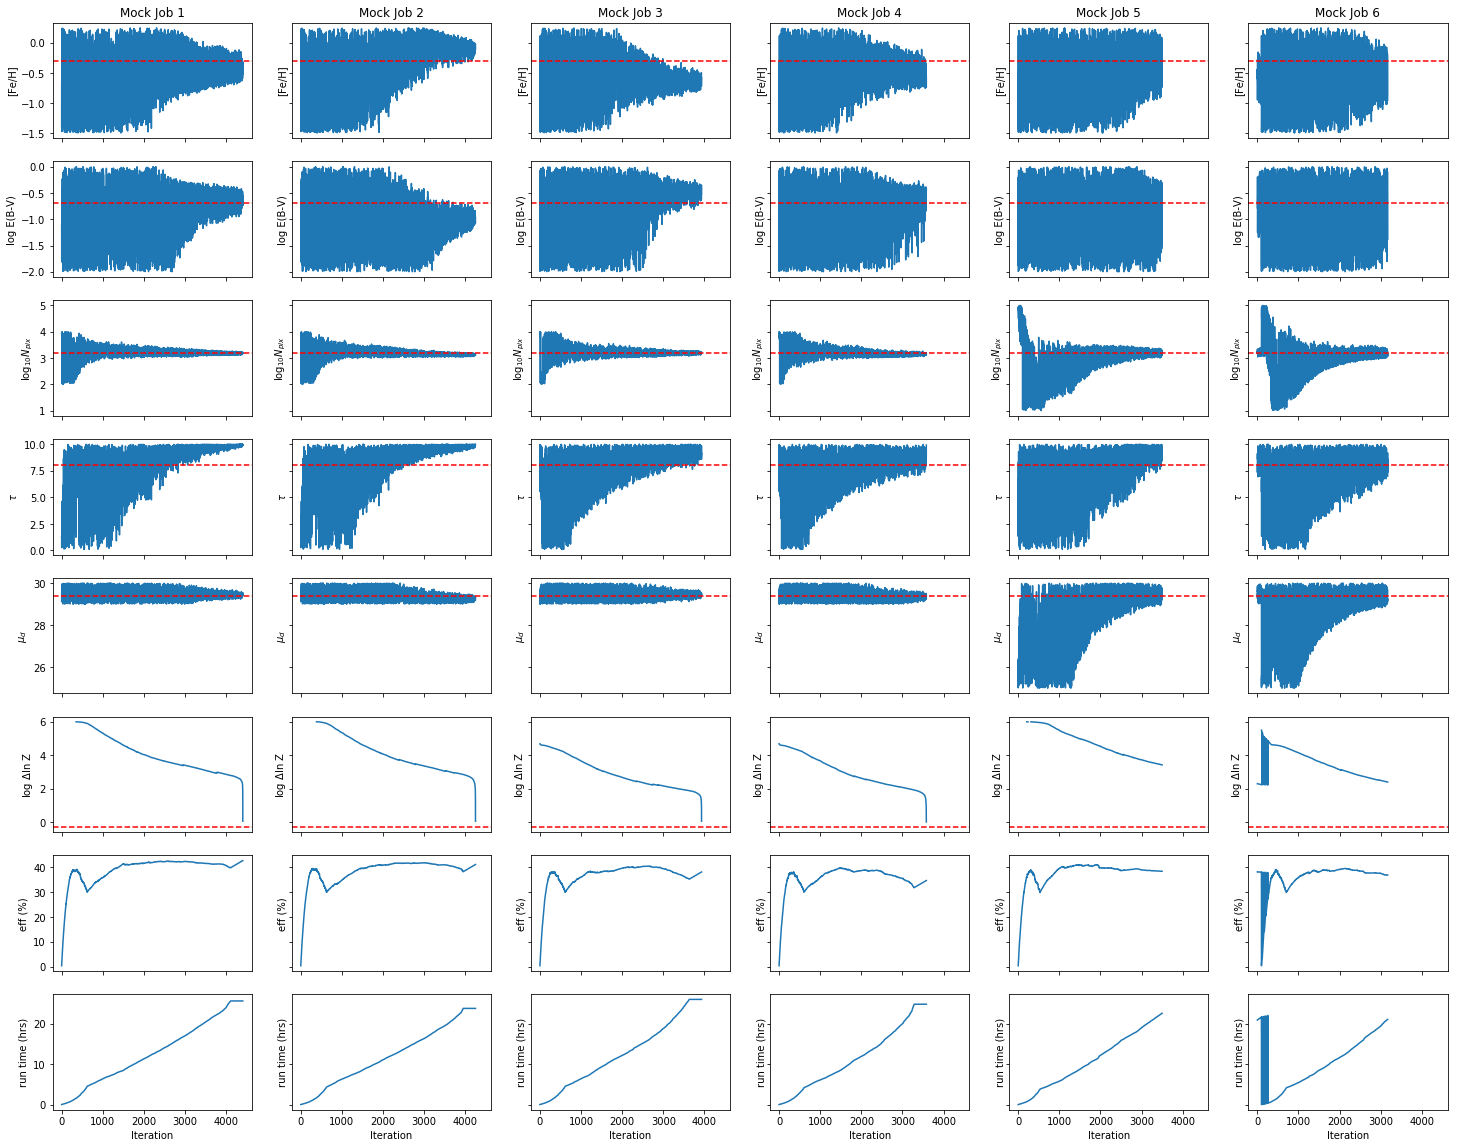

In [27]:
fig, axes = plt.subplots(ncols=6, nrows=8, figsize=(25, 20), sharex=True, sharey='row')
for i in range(6):
    res[i+1].plot_chains(axes=axes[:,i])

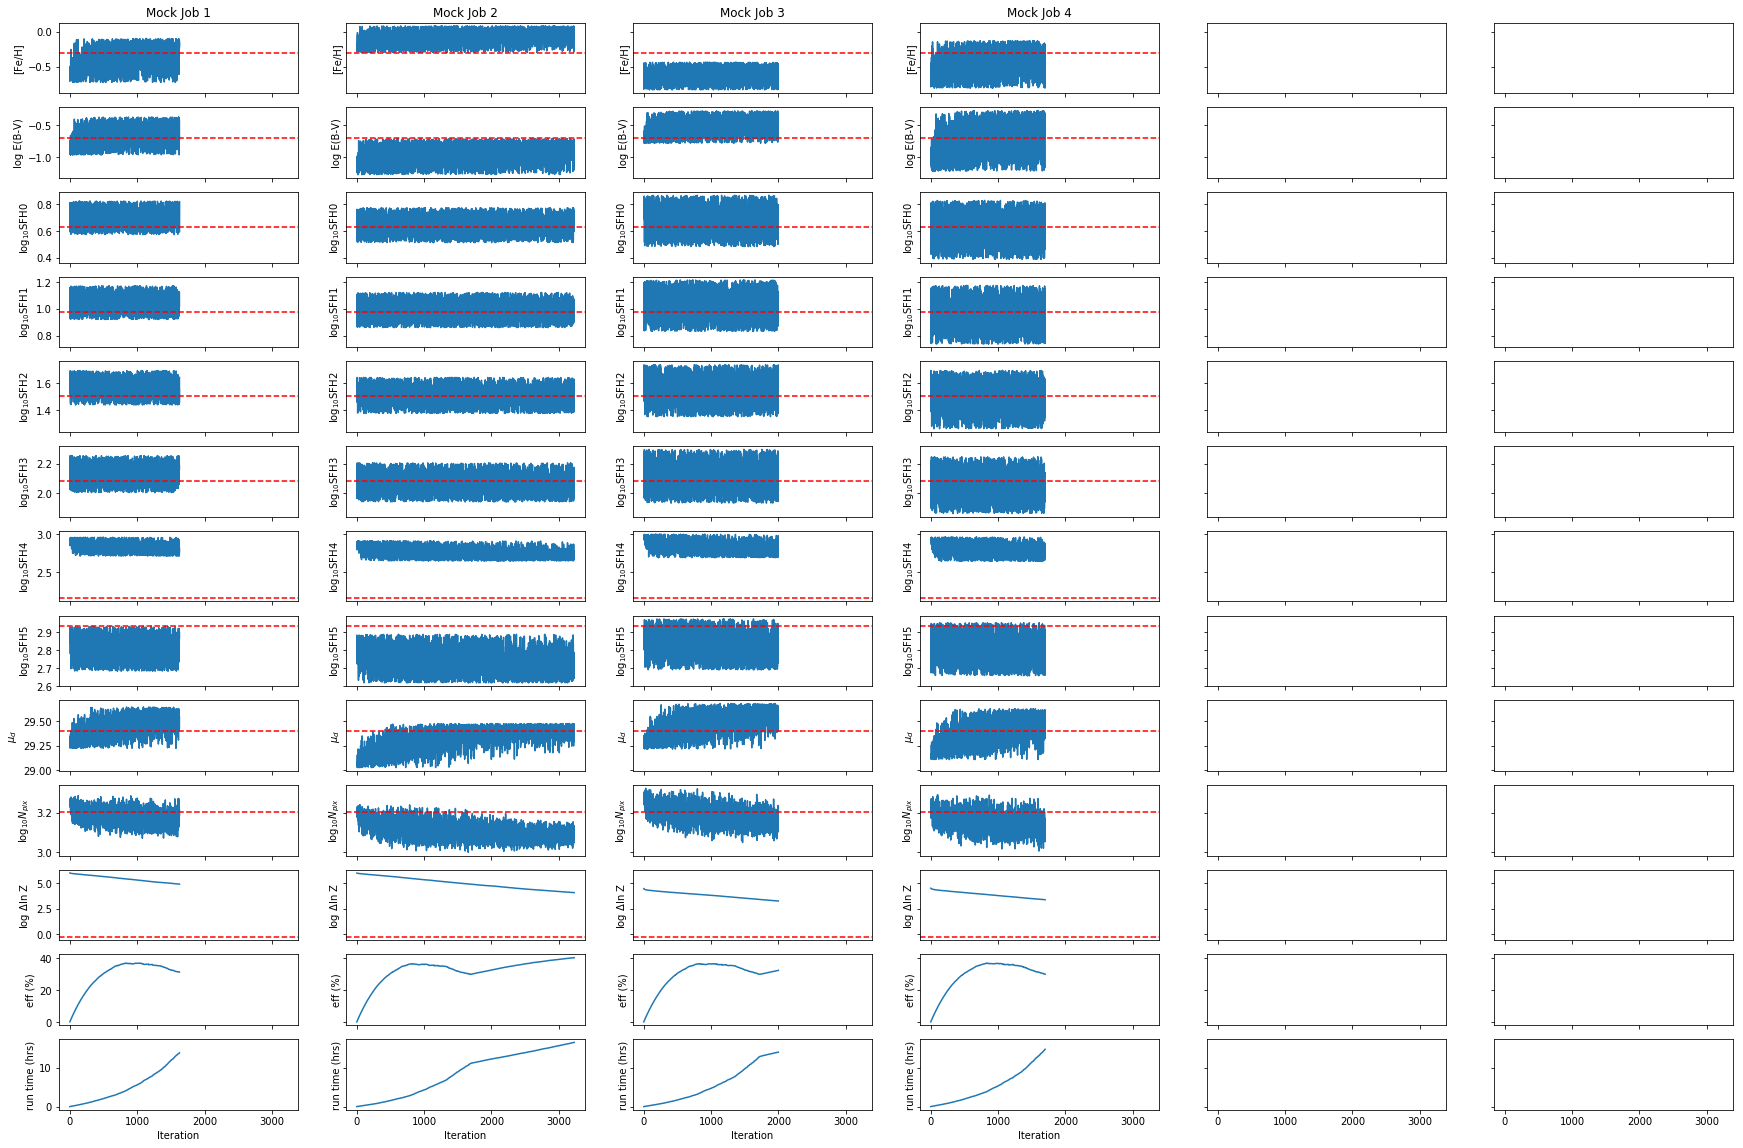

In [28]:
fig, axes = plt.subplots(ncols=6, nrows=13, figsize=(30, 20), sharex=True, sharey='row')
for i in range(6):
    try:
        res_np[i+1].plot_chains(axes=axes[:,i])
    except KeyError:
        pass